In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('gold_price_data.csv', index_col='timestamp', parse_dates=True)

In [ ]:
fig = plt.figure(figsize=(16, 8))

<Figure size 4800x2400 with 0 Axes>

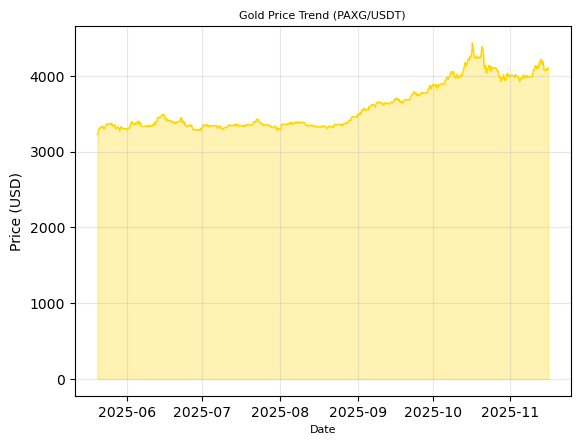

In [19]:
ax1 = plt.subplot(1, 1, 1)
ax1.plot(df.index, df['close'], linewidth=1, color='gold')
ax1.set_title('Gold Price Trend (PAXG/USDT)', fontsize=8, fontweight='light')
ax1.set_xlabel('Date', fontsize=8, fontweight='light')
ax1.set_ylabel('Price (USD)')
ax1.grid(True, alpha=0.3)
ax1.fill_between(df.index, df['close'], alpha=0.3, color='gold')

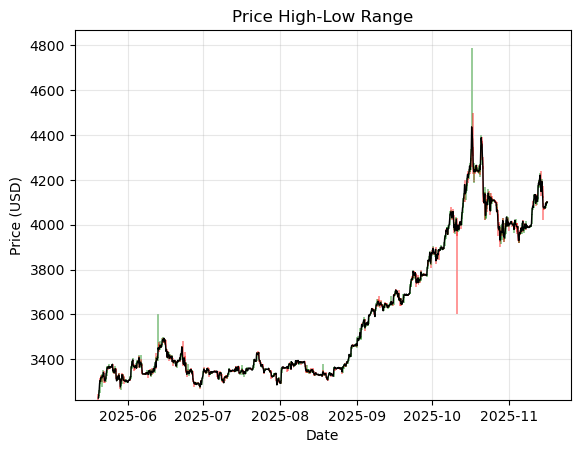

In [23]:
ax2 = plt.subplot(1, 1, 1)
colors = ['green' if df['close'].iloc[i] >= df['open'].iloc[i] else 'red' 
          for i in range(len(df))]
ax2.bar(df.index, df['high'] - df['low'], bottom=df['low'], 
        width=0.8, color=colors, alpha=0.4)
ax2.plot(df.index, df['close'], color='black', linewidth=1)
ax2.set_title('Price High-Low Range', fontsize=12, fontweight='light')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price (USD)')
ax2.grid(True, alpha=0.3)

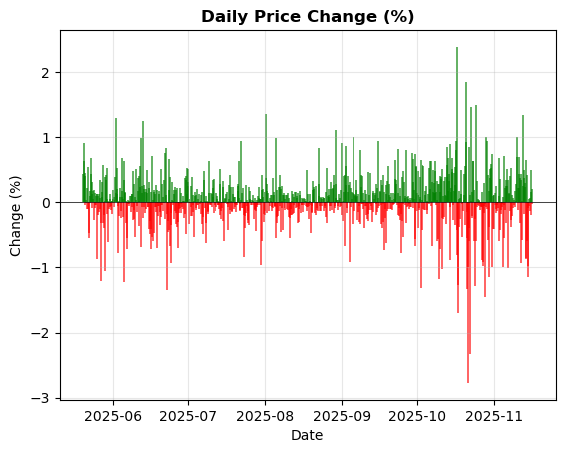

In [25]:
ax3 = plt.subplot(1, 1, 1)
df['daily_return'] = df['close'].pct_change() * 100
colors = ['green' if x > 0 else 'red' for x in df['daily_return']]
ax3.bar(df.index, df['daily_return'], color=colors, alpha=0.6)
ax3.set_title('Daily Price Change (%)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Change (%)')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax3.grid(True, alpha=0.3)

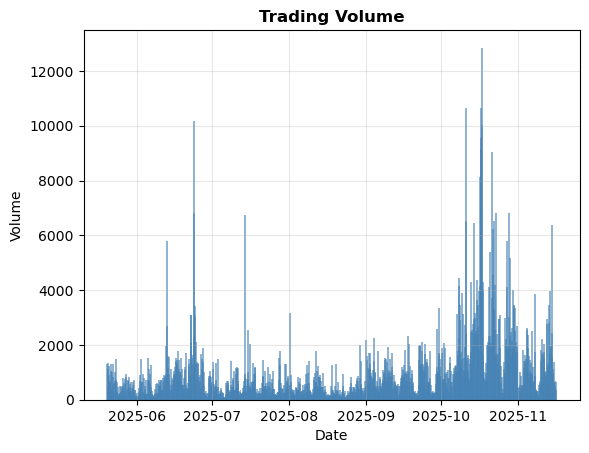

In [27]:
ax4 = plt.subplot(1, 1, 1)
ax4.bar(df.index, df['volume'], color='steelblue', alpha=0.6)
ax4.set_title('Trading Volume', fontsize=12, fontweight='bold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Volume')
ax4.grid(True, alpha=0.3)

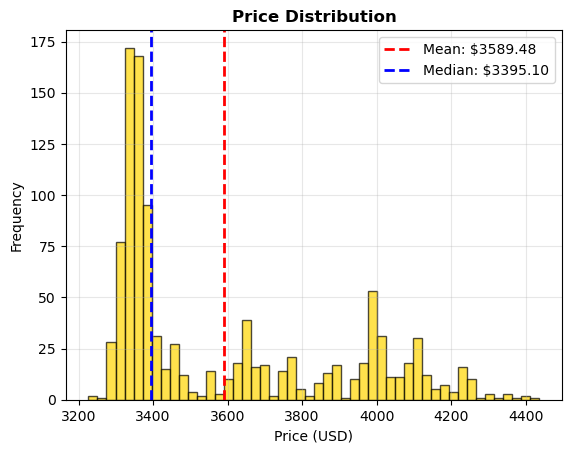

In [28]:
ax5 = plt.subplot(1, 1, 1)
ax5.hist(df['close'], bins=50, color='gold', alpha=0.7, edgecolor='black')
ax5.axvline(df['close'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: ${df["close"].mean():.2f}')
ax5.axvline(df['close'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: ${df["close"].median():.2f}')
ax5.set_title('Price Distribution', fontsize=12, fontweight='bold')
ax5.set_xlabel('Price (USD)')
ax5.set_ylabel('Frequency')
ax5.legend()
ax5.grid(True, alpha=0.3)


✓ Visualization saved as 'gold_price_visualization.png'


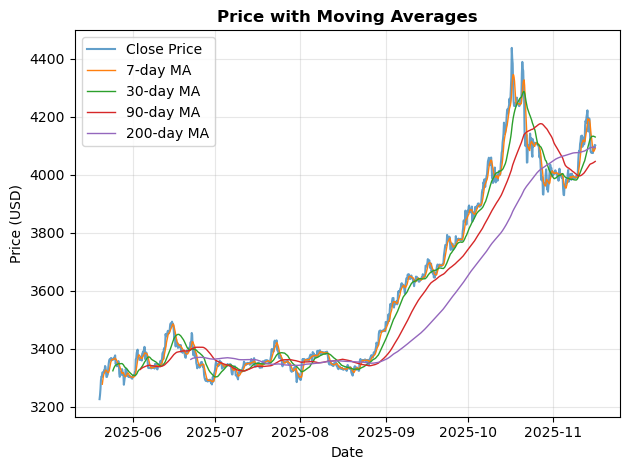

In [33]:
ax6 = plt.subplot(1, 1, 1)
df['MA7'] = df['close'].rolling(window=7).mean()
df['MA30'] = df['close'].rolling(window=30).mean()
df['MA90'] = df['close'].rolling(window=90).mean()
df['MA200'] = df['close'].rolling(window=200).mean()

ax6.plot(df.index, df['close'], label='Close Price', linewidth=1.5, alpha=0.7)
ax6.plot(df.index, df['MA7'], label='7-day MA', linewidth=1)
ax6.plot(df.index, df['MA30'], label='30-day MA', linewidth=1)
ax6.plot(df.index, df['MA90'], label='90-day MA', linewidth=1)
ax6.plot(df.index, df['MA200'], label='200-day MA', linewidth=1)
ax6.set_title('Price with Moving Averages', fontsize=12, fontweight='bold')
ax6.set_xlabel('Date')
ax6.set_ylabel('Price (USD)')
ax6.legend(loc='best')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gold_price_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'gold_price_visualization.png'")
plt.show()

In [34]:
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

print(f"\n📊 Price Statistics:")
print(f"   Current Price: ${df['close'].iloc[-1]:.2f}")
print(f"   Average Price: ${df['close'].mean():.2f}")
print(f"   Highest Price: ${df['close'].max():.2f} (on {df['close'].idxmax().date()})")
print(f"   Lowest Price: ${df['close'].min():.2f} (on {df['close'].idxmin().date()})")
print(f"   Price Range: ${df['close'].max() - df['close'].min():.2f}")

print(f"\n📈 Volatility:")
print(f"   Average Daily Change: {df['daily_return'].mean():.2f}%")
print(f"   Std Dev of Daily Changes: {df['daily_return'].std():.2f}%")
print(f"   Largest Daily Gain: {df['daily_return'].max():.2f}%")
print(f"   Largest Daily Loss: {df['daily_return'].min():.2f}%")

print(f"\n📉 Trend Analysis:")
current_price = df['close'].iloc[-1]
ma7 = df['MA7'].iloc[-1]
ma30 = df['MA30'].iloc[-1]
ma90 = df['MA90'].iloc[-1]
ma200 = df['MA200'].iloc[-1]

print(f"   Current Price vs 7-day MA: {((current_price/ma7 - 1) * 100):.2f}%")
print(f"   Current Price vs 30-day MA: {((current_price/ma30 - 1) * 100):.2f}%")
print(f"   Current Price vs 90-day MA: {((current_price/ma90 - 1) * 100):.2f}%")
print(f"   Current Price vs 200-day MA: {((current_price/ma200 - 1) * 100):.2f}%")

if current_price > ma7 > ma30 > ma90 > ma200:
    print("   📈 Trend: UPWARD (price above moving averages)")
elif current_price < ma7 < ma30 < ma90 < ma200:
    print("   📉 Trend: DOWNWARD (price below moving averages)")
else:
    print("   ↔️  Trend: SIDEWAYS (mixed signals)")


KEY INSIGHTS

📊 Price Statistics:
   Current Price: $4101.17
   Average Price: $3589.48
   Highest Price: $4436.75 (on 2025-10-16)
   Lowest Price: $3226.31 (on 2025-05-20)
   Price Range: $1210.44

📈 Volatility:
   Average Daily Change: 0.02%
   Std Dev of Daily Changes: 0.39%
   Largest Daily Gain: 2.39%
   Largest Daily Loss: -2.77%

📉 Trend Analysis:
   Current Price vs 7-day MA: 0.26%
   Current Price vs 30-day MA: -0.69%
   Current Price vs 90-day MA: 1.38%
   Current Price vs 200-day MA: 0.17%
   ↔️  Trend: SIDEWAYS (mixed signals)
